In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
#importing the banking data using pandas library
Banking_Data = pd.read_csv("C:/Users/aoogb/Desktop/BankData_new.csv", sep=',')
Banking_Data

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,sub_unsub
0,21323,7.000000,9458,1,13301,0,0.000000,0,0,22,8,205,2.000000,0.000000,0.000000,0
1,32936,4.898979,7597,2,23202,0,18.165902,1,1,5,5,326,1.000000,0.000000,0.000000,0
2,11656,7.280110,4154,2,6851,0,30.512293,0,0,27,6,159,1.414214,0.000000,0.000000,0
3,27803,6.324555,9732,2,23202,0,27.313001,1,1,2,2,241,1.000000,16.186414,1.732051,0
4,35916,7.211103,9458,2,13301,0,0.000000,1,0,13,5,179,1.732051,16.031220,2.449490,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65547,43183,7.280110,9458,2,13301,0,24.145393,0,0,17,11,226,1.000000,13.564660,2.000000,1
65548,31957,7.071068,1579,0,13301,0,3.605551,1,0,20,4,76,1.000000,0.000000,0.000000,1
65549,32461,5.656854,5171,2,23202,0,0.000000,1,0,30,4,177,1.414214,0.000000,0.000000,1
65550,29739,6.855655,7597,2,23202,0,18.303005,0,0,17,2,226,1.000000,0.000000,0.000000,1


In [3]:
Banking_Data.drop(['Unnamed: 0'], axis = 1)

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,sub_unsub
0,7.000000,9458,1,13301,0,0.000000,0,0,22,8,205,2.000000,0.000000,0.000000,0
1,4.898979,7597,2,23202,0,18.165902,1,1,5,5,326,1.000000,0.000000,0.000000,0
2,7.280110,4154,2,6851,0,30.512293,0,0,27,6,159,1.414214,0.000000,0.000000,0
3,6.324555,9732,2,23202,0,27.313001,1,1,2,2,241,1.000000,16.186414,1.732051,0
4,7.211103,9458,2,13301,0,0.000000,1,0,13,5,179,1.732051,16.031220,2.449490,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65547,7.280110,9458,2,13301,0,24.145393,0,0,17,11,226,1.000000,13.564660,2.000000,1
65548,7.071068,1579,0,13301,0,3.605551,1,0,20,4,76,1.000000,0.000000,0.000000,1
65549,5.656854,5171,2,23202,0,0.000000,1,0,30,4,177,1.414214,0.000000,0.000000,1
65550,6.855655,7597,2,23202,0,18.303005,0,0,17,2,226,1.000000,0.000000,0.000000,1


### Importing Packages for Classification algorithms

### Splitting the data into Train and Test set

In [4]:
X = Banking_Data.drop('sub_unsub',axis='columns')
y = Banking_Data['sub_unsub']

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [6]:
X_train.shape

(52441, 15)

In [7]:
X_test.shape

(13111, 15)

In [8]:
y_train.shape

(52441,)

In [9]:
 y_test.shape

(13111,)

In [10]:
model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [11]:
lr_prediction = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression accuracy =  0.7968881092212646


In [12]:
from sklearn.metrics import confusion_matrix , classification_report

In [13]:
ypred_model = model.predict(X_test)
ypred_model[:5]

y_pred = []
for element in ypred_model:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
        
y_pred[:10]

y_test[:10]


24750    0
12765    0
60707    1
16468    0
8105     0
8605     0
329      0
18996    0
52105    1
37223    1
Name: sub_unsub, dtype: int64

In [14]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.84      0.73      0.78      6554
           1       0.76      0.86      0.81      6557

    accuracy                           0.80     13111
   macro avg       0.80      0.80      0.80     13111
weighted avg       0.80      0.80      0.80     13111



Logistic Regression accuracy =  0.7968881092212646


Text(0.5, 1.0, 'Confusion matrix for Logistic regression')

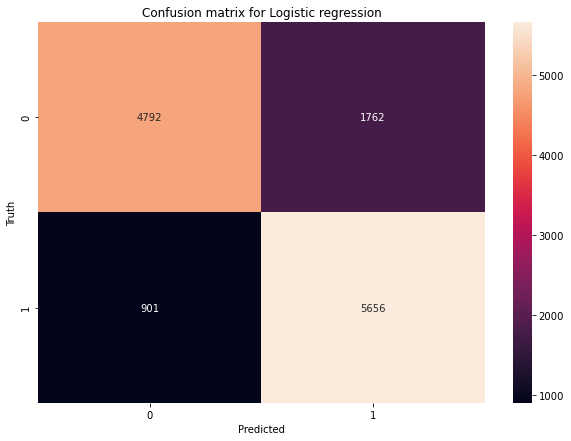

In [15]:
import tensorflow as tf
import seaborn as sn
lr_confusion_matrix = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
print('Logistic Regression accuracy = ', metrics.accuracy_score(lr_prediction,y_test))
sn.heatmap(lr_confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion matrix for Logistic regression')

In [22]:
total1=sum(sum(lr_confusion_matrix))
#####from confusion matrix calculate accuracy
accuracy1=(lr_confusion_matrix[0,0]+lr_confusion_matrix[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = lr_confusion_matrix[0,0]/(lr_confusion_matrix[0,0]+lr_confusion_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = lr_confusion_matrix[1,1]/(lr_confusion_matrix[1,0]+lr_confusion_matrix[1,1])
print('Specificity : ', specificity1)

Accuracy :  tf.Tensor(0.7968881092212646, shape=(), dtype=float64)
Sensitivity :  tf.Tensor(0.7311565456209949, shape=(), dtype=float64)
Specificity :  tf.Tensor(0.8625895989019369, shape=(), dtype=float64)


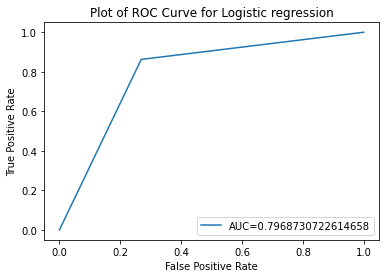

In [24]:
fpr, tpr, _ = metrics.roc_curve(y_test, ypred_model)
auc = metrics.roc_auc_score(y_test,ypred_model)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('Plot of ROC Curve for Logistic regression')
plt.show()

In [23]:



fpr, tpr, _ = metrics.roc_curve(y_test, ypred_model)
auc = metrics.roc_auc_score(y_test,ypred_model)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.title('Plot of ROC Curve for Logistic regression')
plt.show()



cm1 = confusion_matrix(y_test,ypred_model)
print('Confusion Matrix : \n', cm1)

total1=sum(sum(cm1))
#####from confusion matrix calculate accuracy
accuracy1=(cm1[0,0]+cm1[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)

Confusion Matrix : 
 [[4792 1762]
 [ 901 5656]]
Accuracy :  0.7968881092212646
Sensitivity :  0.7311565456209949
Specificity :  0.8625895989019369


In [17]:
fpr 

array([0.        , 0.26884345, 1.        ])

In [18]:
tpr

array([0.       , 0.8625896, 1.       ])